# **The Sparks Foundation** <br> (GRIPMARCH23)
## "Data Science & Business Analytics"<br>
## Task-2 : Prediction using Unsupervised ML <br>
#### Perform a Cluster analysis to Predict the optimum number of clusters and represent it visually <br>
## **Aurthor** : *Yati Maheshwari*
## Importing the relevant libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn .cluster import KMeans 

# Species Segmentation with Cluster Analysis<br>
### The Iris flower dataset is one of the most popular ones for machine learning.<br>
You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set
 
![image](fg3o38jw.bmp)


## There are 4 features: sepal length, sepal width, petal length, and petal width.<br>
Start by creating 2 clusters. Then standardize the data.
### Using the Elbow rule to determine how many clusters are there.<br>
## Loading the Data

In [2]:
data = pd.read_csv('Iris - Iris.csv')
df = data.drop(['Id'],axis=1)
# df.style.background_gradient(cmap='RdPu')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Dealing with missing values

In [3]:
#Checking null data
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No missing values

In [4]:
# Frequency of different Species
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

We have three different Species, which has equal number of frequency.

## Ploting the Dataset<br>
We are doing seperate analysis on sepal and petal with their respective length and width.

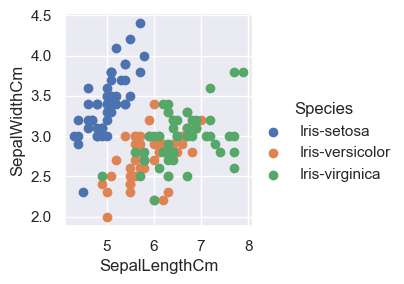

In [5]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width)
scs = sns.FacetGrid(data, hue="Species") 
scs.map(plt.scatter, "SepalLengthCm", "SepalWidthCm") 
scs.add_legend()
plt.show()


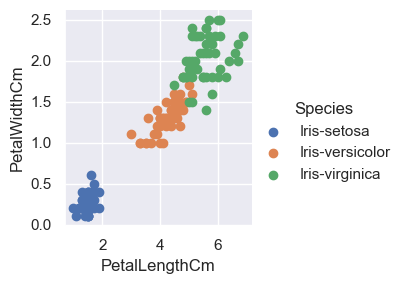

In [6]:
# create a scatter plot based on two corresponding features ( petal_length and petal_width)
scp = sns.FacetGrid(data, hue="Species") 
scp.map(plt.scatter,'PetalLengthCm','PetalWidthCm') 
scp.add_legend()
plt.show()

## Select the features
For Sepal 

In [7]:
# create a variable which will contain the data for the clustering
x = df.iloc[:,0:2]
x

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


For Petal

In [8]:
# create a variable which will contain the data for the clustering
y = df.iloc[:,2:4]
y

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


## Clustering (unscaled data)

In [9]:
# create a k-means object with 2 clusters
kmeans = KMeans(2)
# fit the data
kmeans.fit(x)
kmeans.fit(y)

C:\Users\yatim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yatim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

## Clustering Results<br>
#### predict the cluster for each observation and create a scatter plot based on two corresponding features

In [10]:
identified_cluster_sepal = kmeans.fit_predict(x)
# create a copy of data, so we can see the clusters next to the original data
data_with_cluster_s = x.copy()
data_with_cluster_s['Clusters'] = identified_cluster_sepal
data_with_cluster_s


C:\Users\yatim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,SepalLengthCm,SepalWidthCm,Clusters
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,1
147,6.5,3.0,1
148,6.2,3.4,1


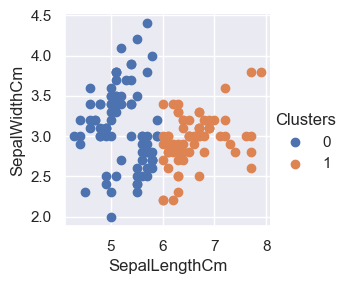

In [11]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width)
sc_s = sns.FacetGrid(data = data_with_cluster_s, hue="Clusters") 
sc_s.map(plt.scatter, "SepalLengthCm", "SepalWidthCm") 
sc_s.add_legend()
plt.show()


In [12]:
identified_cluster_petal = kmeans.fit_predict(y)
# create a copy of data, so we can see the clusters next to the original data
data_with_cluster_p = y.copy()
data_with_cluster_p['Clusters'] = identified_cluster_sepal
data_with_cluster_p

C:\Users\yatim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,PetalLengthCm,PetalWidthCm,Clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


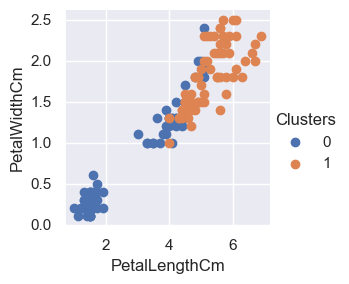

In [13]:
# create a scatter plot based on two corresponding features ( petal_length and petal_width)
scp = sns.FacetGrid(data_with_cluster_p, hue="Clusters") 
scp.map(plt.scatter,'PetalLengthCm','PetalWidthCm') 
scp.add_legend()
plt.show()

## Standardize the variables<br>
Import and use the <i> scale </i> method from sklearn to standardize the data. 

In [14]:
# import some preprocessing module
from sklearn import preprocessing

# scale the data for better results
sepal_scaled = preprocessing.scale(x)
petal_scaled = preprocessing.scale(y)

## Clustering (scaled data)

In [15]:
# create a k-means object with 2 clusters
kmeans_scaled = KMeans(2)
# fit the data
kmeans_scaled.fit(sepal_scaled)
kmeans_scaled.fit(petal_scaled)
# create a copy of data, so we can see the clusters next to the original data
clusters_sepal_scaled = x.copy()
cluster_petal_scaled = y.copy()
# predict the cluster for each observation
clusters_sepal_scaled['cluster_pred_s']=kmeans_scaled.fit_predict(sepal_scaled)
cluster_petal_scaled['cluster_pred_p']=kmeans_scaled.fit_predict(petal_scaled)
clusters_sepal_scaled

C:\Users\yatim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yatim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yatim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

,SepalLengthCm,SepalWidthCm,cluster_pred_s
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,0
147,6.5,3.0,0
148,6.2,3.4,0


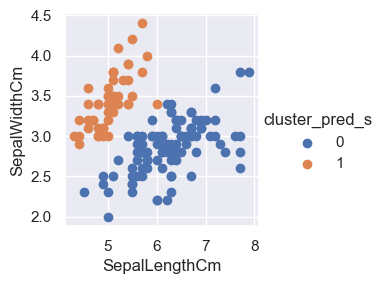

In [17]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width)
sc_s = sns.FacetGrid(data = clusters_sepal_scaled, hue="cluster_pred_s") 
sc_s.map(plt.scatter, "SepalLengthCm", "SepalWidthCm") 
sc_s.add_legend()
plt.show()


In [18]:
cluster_petal_scaled

,PetalLengthCm,PetalWidthCm,cluster_pred_p
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


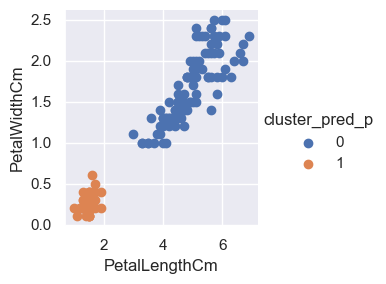

In [19]:
# create a scatter plot based on two corresponding features ( petal_length and petal_width)
scp = sns.FacetGrid(cluster_petal_scaled, hue="cluster_pred_p") 
scp.map(plt.scatter,'PetalLengthCm','PetalWidthCm') 
scp.add_legend()
plt.show()

Looks like the two solutions are identical. That is because the original features have very similar scales to start with!

## Take Advantage of the Elbow Method
## Select the number of Cluster<br>
### WCSS('within-cluster sum of squares')
By minimising the wcss get perfect clustring solution 

In [20]:
wcss = []
cl_nm = 10
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. 
# We have it set at 10 right now, but it is completely arbitrary.
for i in range(1,cl_nm):
    kmeans = KMeans(i)
    kmeans.fit(sepal_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

wcss

C:\Users\yatim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yatim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yatim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

[300.0,
 168.39262198361087,
 103.78443895265741,
 79.79033780462991,
 61.70659834761937,
 53.18034163278959,
 44.36522138668026,
 36.228586288894256,
 31.37245741134495]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

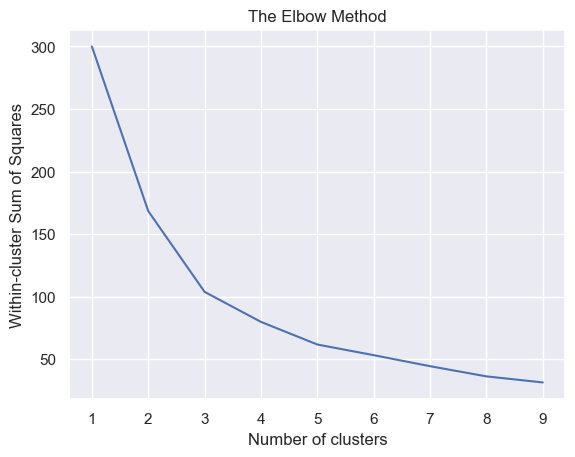

In [21]:
number_clusters = range(1,cl_nm)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')


by analysing this graph 4-5 clusters are much better

In [ ]:
kmeans_scaled = KMeans(4)
kmeans_scaled.fit(sepal_scaled)
clusters_sepal_scaled = x.copy()
clusters_sepal_scaled['cluster_pred_s']=kmeans_scaled.fit_predict(sepal_scaled)
# create a scatter plot based on two corresponding features (sepal_length and sepal_width)
sc_s = sns.FacetGrid(data = clusters_sepal_scaled, hue="cluster_pred_s", size=6) 
sc_s.map(plt.scatter, "SepalLengthCm", "SepalWidthCm") 
sc_s.add_legend()
plt.show()


In [ ]:
wcss_p = []
cl_nm = 10
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. 
# We have it set at 10 right now, but it is completely arbitrary.
for i in range(1,cl_nm):
    kmeans = KMeans(i)
    kmeans.fit(petal_scaled)
    wcss_iter = kmeans.inertia_
    wcss_p.append(wcss_iter)

wcss_p

### The Elbow Method

In [ ]:
number_clusters = range(1,cl_nm)
plt.plot(number_clusters, wcss_p)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')


It seems like 3-cluster solutions are the best.

In [ ]:
kmeans_scaled = KMeans(3)
kmeans_scaled.fit(petal_scaled)
cluster_petal_scaled = y.copy()
cluster_petal_scaled['cluster_pred_p']=kmeans_scaled.fit_predict(petal_scaled)
# create a scatter plot based on two corresponding features ( petal_length and petal_width)
scp = sns.FacetGrid(cluster_petal_scaled, hue="cluster_pred_p", size=6) 
scp.map(plt.scatter,'PetalLengthCm','PetalWidthCm') 
scp.add_legend()
plt.show()